## Longitude policy

In [1]:
# Imports
from gfeatpy import plotting
from gfeatpy.observation import Range, Constellation, LongitudePolicy
from gfeatpy.gravity import EquivalentWaterHeight, GravityField, SphericalHarmonicsCovariance
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.dpi"] = 300

In [2]:
# Define error spectra
mwi = lambda f: 2.62 * np.sqrt(1 + (0.003/f)**2) * 1e-6
acc = lambda f: 1e-10 * np.sqrt(1 + (f/0.5)**4 + (0.005/f))
# Define observation settings
l_max = 60
Nr = 16
Nd = 1
I = np.deg2rad([89, 50, 70, 30])
rho= 220e3
# Set up system and solve
multipair = Constellation(l_max, Nr, Nd, I, rho, LongitudePolicy.INTERLEAVING)
multipair.set_observation_error(mwi, acc)
multipair.set_kaula_regularization()
multipair.solve()

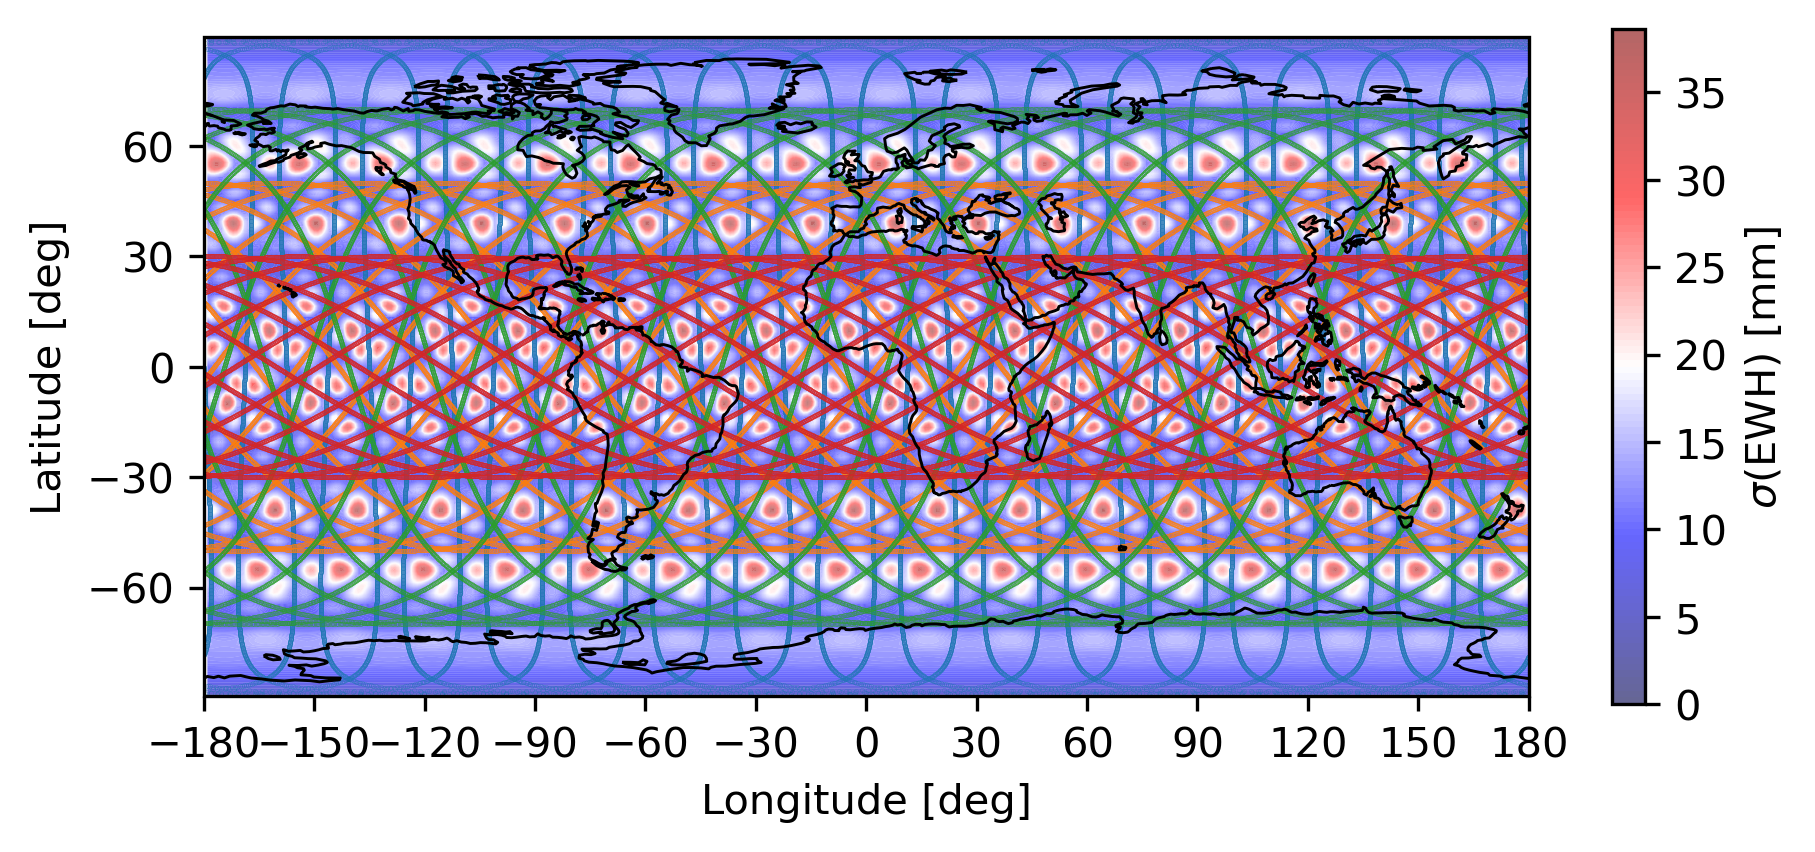

In [3]:
plotting.synthesis(multipair, 360, 180, EquivalentWaterHeight(0))
for i, pair in enumerate(multipair.get_observations()):
    wo_0 = pair.get_wo_0()
    we_0 = pair.get_we_0()
    plotting.ground_track(Nr, Nd, I[i], we_0=we_0, wo_0=wo_0, s=0.005)
plt.show()

In [4]:
# Define error spectra
mwi = lambda f: 2.62 * np.sqrt(1 + (0.003/f)**2) * 1e-6
acc = lambda f: 1e-10 * np.sqrt(1 + (f/0.5)**4 + (0.005/f))
# Define observation settings
l_max = 60
Nr = 16
Nd = 1
I = np.deg2rad([89, 70, 50, 30])
rho= 220e3
# Set up system and solve
multipair = Constellation(l_max, Nr, Nd, I, rho, LongitudePolicy.OVERLAPPING)
multipair.set_observation_error(mwi, acc)
multipair.set_kaula_regularization()
multipair.solve()

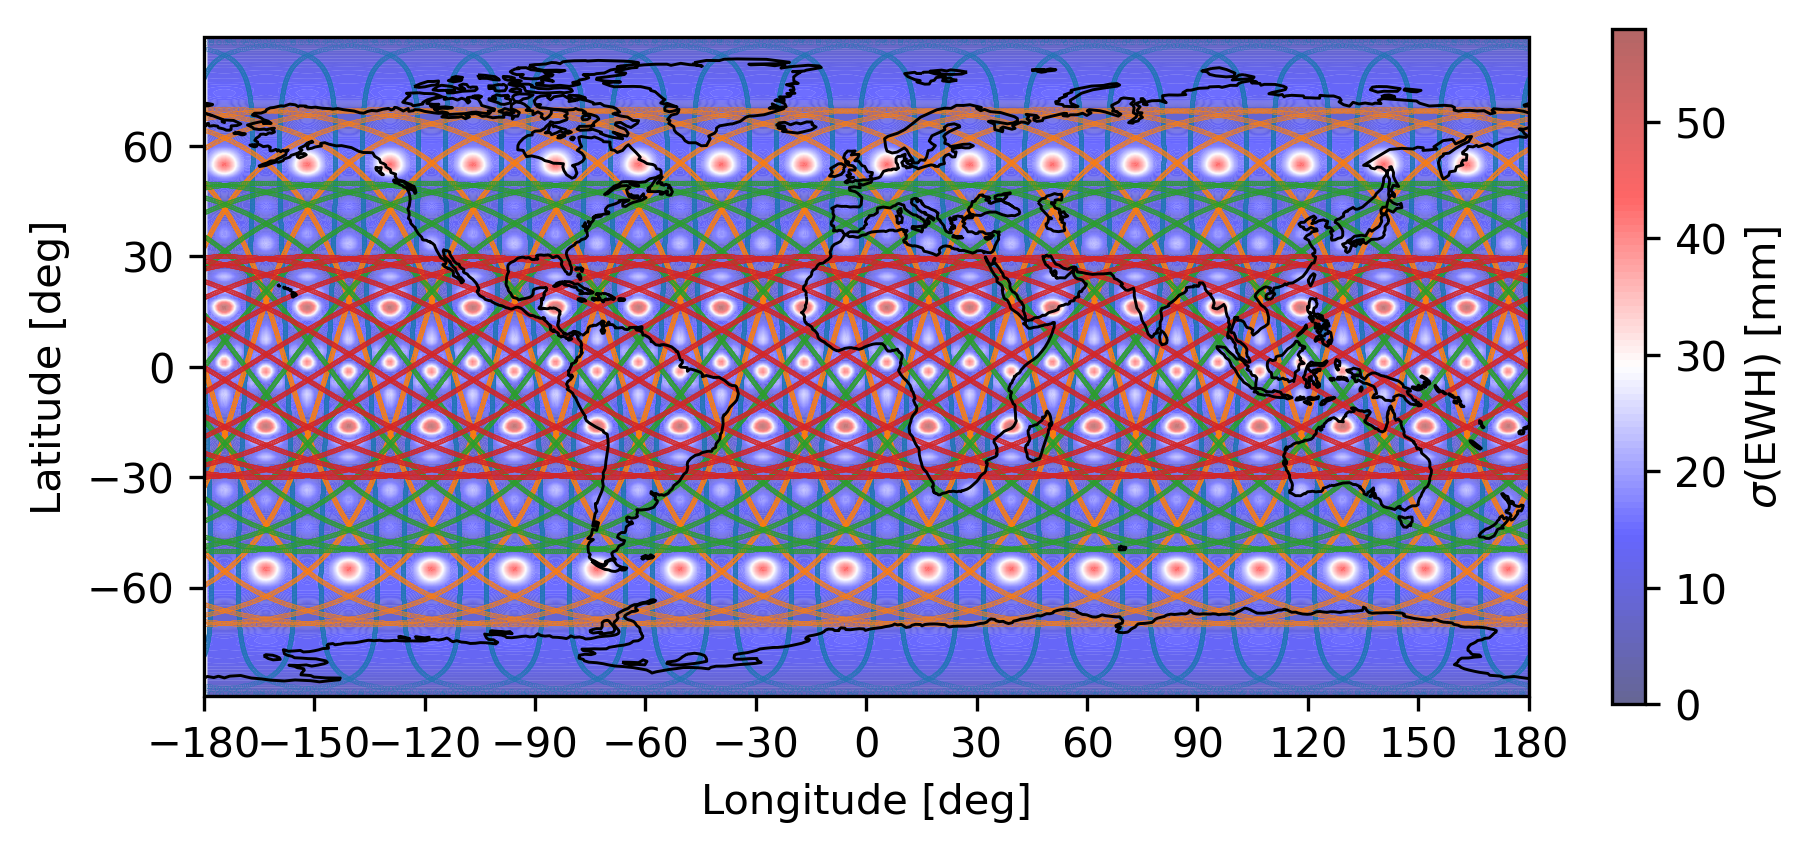

In [5]:
plotting.synthesis(multipair, 360, 180, EquivalentWaterHeight(0))
for i, pair in enumerate(multipair.get_observations()):
    wo_0 = pair.get_wo_0()
    we_0 = pair.get_we_0()
    plotting.ground_track(Nr, Nd, I[i], we_0=we_0, wo_0=wo_0, s=0.005)
plt.show()